In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from plots import *

In [69]:
df = pd.read_csv('Experience-Salary.csv')
X = df.iloc[:, 0]
y = df.iloc[:, 1]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

Text(0, 0.5, 'y')

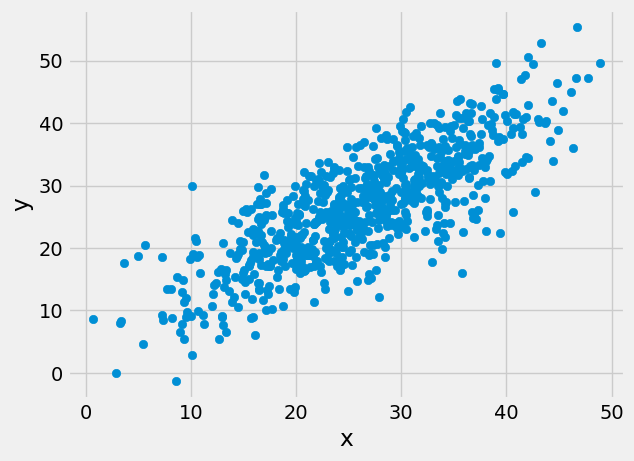

In [44]:
plt.scatter(X_train, y_train)
plt.xlabel('x')
plt.ylabel('y')

In [50]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
    m= x.shape[0]
    f_wb = np.dot(x, w) + b
    cost = np.sum((f_wb - y)**2)
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [51]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    dj_dw = np.dot(x.T, (f_wb - y)) / m
    dj_db = np.sum(f_wb - y) / m
    
    return dj_dw, dj_db

In [52]:
import math, copy
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
  w = copy.deepcopy(w_in)  # avoid modifying global w_in
  # An array to store cost J and w's at each iteration primarily for graphing later
  J_history = []
  p_history = []
  b = b_in
  w = w_in

  for i in range(num_iters):
    # Calculate the gradient and update the parameters using gradient_function
    dj_dw, dj_db = gradient_function(x, y, w, b)

    # Update Parameters using equation (3) above
    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    # Save cost J at each iteration
    if i < 100000:  # prevent resource exhaustion
      J_history.append(cost_function(x, y, w, b))
      p_history.append([w, b])

    # Print cost every at intervals 10 times or as many iterations if < 10
    if i % math.ceil(num_iters / 10) == 0:
      print(f"Iteration {i:4}: Cost {J_history[-1]} ",
            f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
            f"w: {w}, b:{b}")

  return w, b, J_history, p_history

In [53]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-6
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 392.82449174791407  dj_dw: -757.3046145009795, dj_db: -26.66813244290302   w: 0.0007573046145009795, b:2.666813244290302e-05
Iteration 1000: Cost 97.92235036918747  dj_dw: -354.2920608145884, dj_db: -12.746877874920042   w: 0.5310848941720017, b:0.018854340784323
Iteration 2000: Cost 33.37419875421882  dj_dw: -165.74453592070466, dj_db: -6.233858748437947   w: 0.7791868229625115, b:0.027933083586941992
Iteration 3000: Cost 19.2457481057323  dj_dw: -77.53346500512616, dj_db: -3.1867476963265573   w: 0.8952508060237516, b:0.03245080973985864
Iteration 4000: Cost 16.153122168007393  dj_dw: -36.26433168008764, dj_db: -1.7611454211016127   w: 0.9495414587236783, b:0.03483466001025086
Iteration 5000: Cost 15.476008941064256  dj_dw: -16.956762845118465, dj_db: -1.0941583952177925   w: 0.9749317505429235, b:0.03622016078104916
Iteration 6000: Cost 15.327601283454454  dj_dw: -7.9238085575183685, dj_db: -0.7820859444798789   w: 0.9868011454807143, b:0.0371385627266796
Iterat

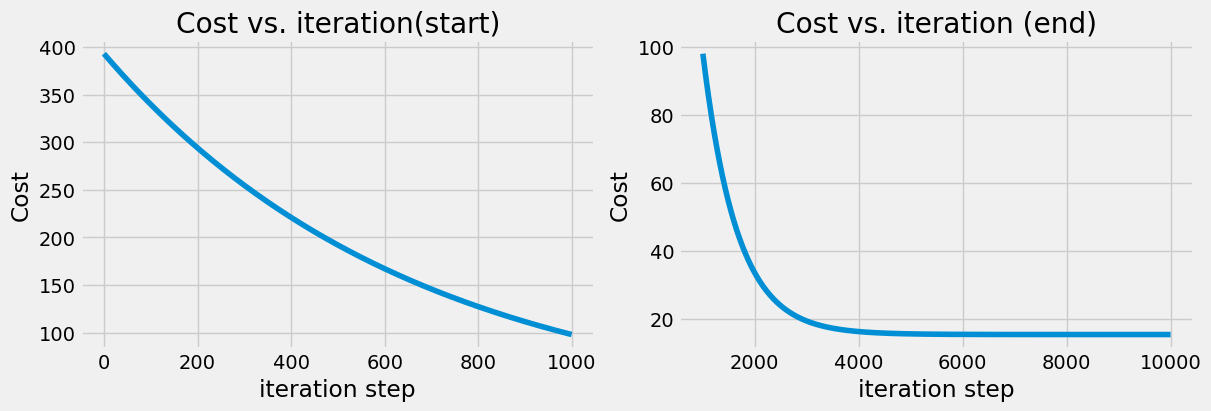

In [54]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1000])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [60]:
predicted = w_final * X_train + b_final
predicted

687    19.123684
500    20.053758
332    10.785311
979    27.166479
817    31.230251
         ...    
835    16.453859
192    17.281755
629    36.351980
559    23.560597
684    41.955554
Name: exp(in months), Length: 800, dtype: float64

Text(0.5, 0, 'x')

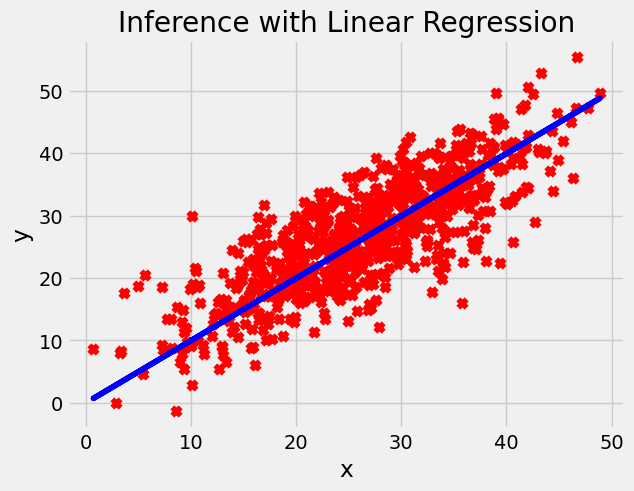

In [66]:
# Plot the linear fit
plt.plot(X_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

In [85]:
from sklearn.metrics import r2_score 

# R2 score
r2 = r2_score(y_train,predicted)
print("R2 score : ", r2)

R2 score :  0.595672104977327


c:\Users\MR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\MR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\MR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\MR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [75]:
X_train_new = X_train.values.reshape(-1, 1)  # Convert to NumPy array and reshape X_train
y_train_new = y_train.values.reshape(-1) 
X_val_new = X_test.values.reshape(-1, 1)
y_val_new = y_test.values.reshape(-1)

In [80]:
from sklearn.linear_model import LinearRegression
import time

model = LinearRegression()

start_time = time.time()
model.fit(X_train_new, y_train_new)
end_time = time.time()
time_taken = end_time - start_time

print("Training time for 10000 iterations:", time_taken)

Training time for 10000 iterations: 0.0009992122650146484


In [86]:
r2 = r2_score(y_val_new, model.predict(X_val_new))
print("R2 score : ", r2)

R2 score :  0.7461884708900269
